# Lab 3 Pre-Lab: Neural Networks & Computer Vision Basics

You are NOT allowed to import any other libraries in this notebook otherwise points will be deducted. If you need to please confirm with the TA.
`''' TODO '''` Indicates where your solution code should go. Please ensure code is readable easily.


## 1. Simple Neural Network

For this task, you'll implement a rudimentary neural network with one hidden layer.

**Network Architecture:**

- **Input Layer:**
   - 3 neurons
- **Hidden Layer:**
   - 6 neurons
   - Weight matrix `W1` and bias vector `b1`
   - Activation: ReLU
- **Output Layer:**
   - 4 neurons
   - Weight matrix `W2` and bias vector `b2`
   - Activation: Sigmoid

**Tasks:**

1. **Activation Function:**
   - Implement the ReLU and sigmoid activation functions manually, without using external libraries for this purpose.

      ReLU: 
      $$ \text{ReLU}(z) = \max(0, z) $$

      Sigmoid: 
      $$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

2. **Initialization:**
   - Create an input vector `X` with 3 random values between 0 and 1.
   - Based on the network architecture, initialize the weight matrices `W1` and `W2` with random values between 0 and 1.
   - Similarly, initialize the bias vectors `b1` and `b2` with random values between 0 and 1.

   You can use `np.random.rand()`

3. **Forward Pass:**
   - Using the initialized values and considering the specified network architecture, perform the forward pass through the network. Make sure to:
     - Compute the activations for the hidden layer.
     - Apply the ReLU activation function.
     - Compute the activations for the output layer.
     - Apply the sigmoid activation function to get the final output.

4. **Display the Result:**
   - Print the final output from the neural network.

**Note:**
Ensure the matrices' shapes are compatible throughout the network. Do not use external libraries for the forward pass. You are not allowed to import any other libraries.


In [59]:
import numpy as np
np.random.seed(42) # Do not modify

# Activation Functions
def relu(z):
    z = z.flatten()
    a = np.zeros(z.shape)
    for i in range(len(a)):
        a[i] = max(0, z[i])
    return a

def sigmoid(z):
    z = z.flatten()
    a = np.zeros(z.shape)
    for i in range(len(a)):
        a[i] = 1 / (1 + np.exp(-z[i]))
    return a

# 1. Initialization
X = np.random.rand(1, 3)
W1 = np.random.rand(3, 6)
W2 = np.random.rand(6, 4)
b1 = np.random.rand(1, 6)
b2 = np.random.rand(1, 4)

# 2. Forward Pass
A2 = sigmoid(np.matmul(relu(np.matmul(X, W1) + b1), W2) + b2)

""" Does not give expected Output. Don't know why"""

# 3. Display the Result
print("Final Output A2:")
print(A2)


Final Output A2:
[0.98462485 0.99340692 0.99618285 0.95022235]


## 2. Image Manipulations

You will be working with and manipulating `messi.jpeg` which is found in your repos.

**Tasks:**

1. **Image Display:**
   Load image`'messi.jpeg'` using PIL. Display the loaded image using matplotlib. You may find `open()` from PIL and `imshow()` from matplotlib useful.

2. **Image to Numpy Array:**
   Convert the image into a NumPy array and print its shape.

3. **Color Channels:**
   Split the image into its R, G, B channels and display each channel separately.

4. **Grayscale Conversion:**
   Convert the image to grayscale and display the grayscale image.

5. **Image Normalization:**
   Normalize the grayscale image such that values are in the range [0,1]. Print the minimum and maximum values before and after normalization.

6. **Image Crop:**
   Extract a center crop of 500x500 from the grayscale image and display the resized image.

7. **Convolution with Sobel Kernel:**
Manually apply convolution (do not use built-in functions like `numpy.convolve` or `scipy.signal.convolve2d`) to the cropped 500x500 image using the Sobel kernel provided below. Display the convoluted image.
   
   Sobel kernel:
   `[[-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]]`


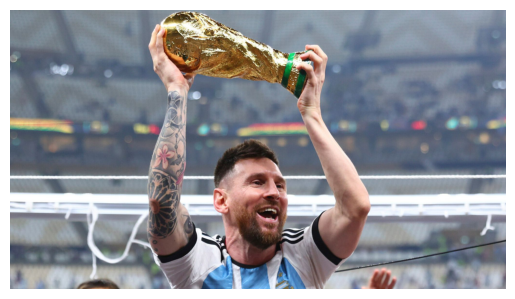

Image Dimensions: (1152, 2048, 3)


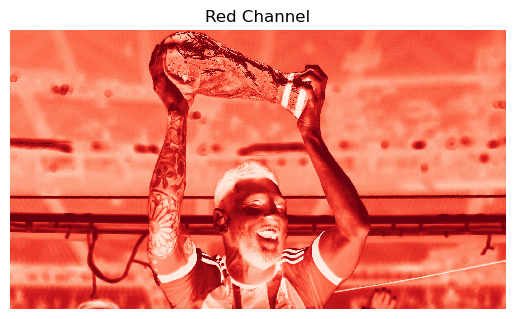

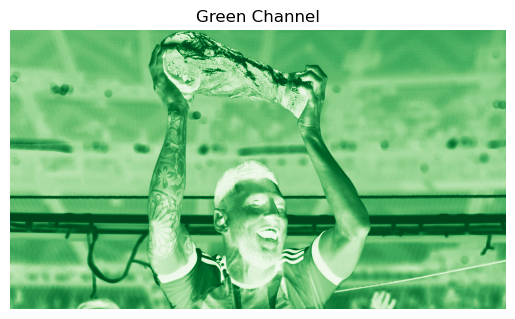

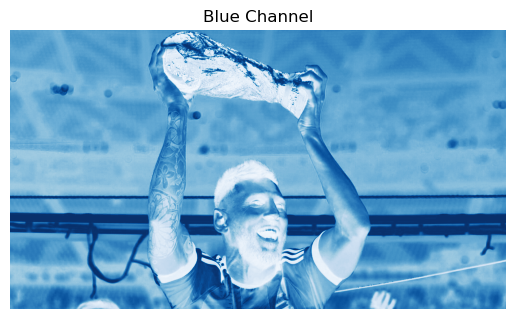

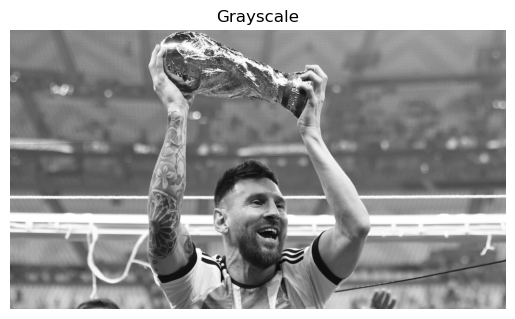

Before Normalization:
 Min = 0 Max = 255
After Normalization:
 Min = 0.0 Max = 1.0


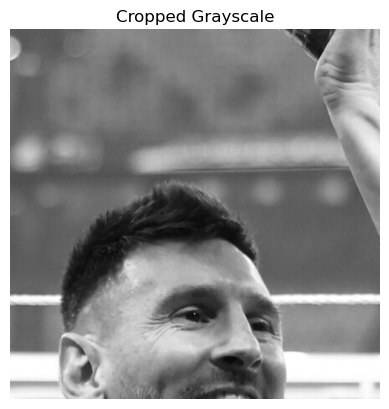

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# 1. Load the image using PIL & Display
im = Image.open("messi.jpeg")
plt.axis('off')
plt.imshow(im)
plt.show()

# 2. Image to Numpy Array
im_arr = np.array(im)
print("Image Dimensions:", im_arr.shape)

# 3. Color Channels
im_red = im_arr[:, :, 0]
im_green = im_arr[:, :, 1]
im_blue = im_arr[:, :, 2]

""" Images for red, green, blue channels look different from expected output. Don't know why"""

plt.axis('off')
plt.imshow(im_red, cmap='Reds', interpolation='none')
plt.title("Red Channel")
plt.show()

plt.axis('off')
plt.imshow(im_green, cmap='Greens')
plt.title("Green Channel")
plt.show()

plt.axis('off')
plt.imshow(im_blue, cmap='Blues')
plt.title("Blue Channel")
plt.show()

# 4. Grayscale Conversion
plt.axis('off')
im_gray = im.convert('L')
plt.imshow(im_gray, cmap='gray')
plt.title("Grayscale")
plt.show()

# 5. Image Normalization
im_gray_arr = np.array(im_gray)
print("Before Normalization:\n Min =", min(im_gray_arr.flatten()), "Max =", max(im_gray_arr.flatten()))

im_gray_norm = im_gray_arr / 255
print("After Normalization:\n Min =", min(im_gray_norm.flatten()), "Max =", max(im_gray_norm.flatten()))

# 6. Image Center Crop
plt.axis('off')
center = (im_arr.shape[0] // 2, im_arr.shape[1] // 2)
im_crop = im_gray_arr[center[0] - 250 : center[0] + 250, center[1] - 250 : center[1] + 250]
plt.title("Cropped Grayscale")
plt.imshow(im_crop, cmap='gray')
plt.show()

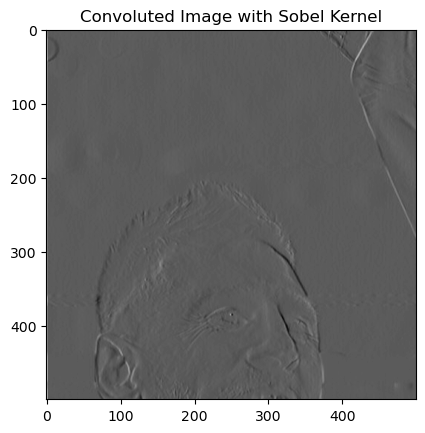

In [21]:
# 7. Convolution with Sobel Kernel
kernel = [[-1, 0, 1],
         [-2, 0, 2],
         [-1, 0, 1]]

# Pad array
im_crop_pad = np.pad(im_crop, 1)

# New Convoluted Image
im_kernel = np.zeros(im_crop.shape)


for r in range(len(im_crop)):
    for c in range(len(im_crop[0])):
        # perform kernel operation for specific pixel
        for i in range(len(kernel)):
            for j in range(len(kernel[0])):
                im_kernel[r][c] += kernel[i][j] * im_crop_pad[r - 1 + i][c - 1 + j]

plt.imshow(im_kernel, cmap='gray')
plt.title("Convoluted Image with Sobel Kernel")
plt.show()